理論的平均待ち時間 8.0


平均待ち時間(シミュレーション結果) 7.16 分


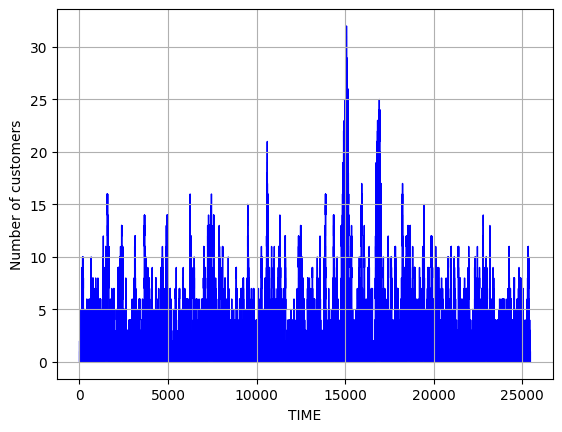

In [2]:
import math
import random
import matplotlib.pyplot as plt

τ_i = 2.5   # 平均到着間隔
τ_s = 2.0   # 平均サービス時間

λ = 1/τ_i   # 平均到着率
μ = 1/τ_s   # 平均サービス率
ρ = λ/μ    # 混雑度

# print('理論的平均システム内人数',round(ρ/(1-ρ),2))
print('理論的平均待ち時間',round(ρ/(μ-λ),2))
print('\n')

N = 10000

t = 0
t_interval = 0    # 到着間隔
t_service = 0     # サービス時間
t_arrival = 0     # 到着時刻
t_start = 0       # 開始時刻
t_end = 0         # 終了時刻
t_wait = 0        # 待ち時間

T_arrival = [] # 到着時刻のリスト
T_start = []   # 開始時刻のリスト
T_end = []     # 終了時刻のリスト
T_arrival = [] # 到着時刻のリスト
T_wait = []    # 待ち時間のリスト

n_system = 0      # システム内人数
n_queue = 0       # 待ち人数

N_system = []     # システム内人数リスト
N_queue = []      # 待ち人数のリスト

# print(" 客 到着時刻 開始時刻 Ｓ時間 終了時刻 待ち時間")

i = 0
while i < N:
    t_interval = -τ_i*math.log(1-random.random())
    t_service = -τ_s*math.log(1-random.random())

    t_arrival = t_arrival + t_interval
    T_arrival.append(t_arrival)

    if t_end > t_arrival:
        t_start = t_end
        T_start.append(t_start)

    else:
        t_start = t_arrival
        T_start.append(t_start)

    t_end = t_start + t_service
    T_end.append(t_end)
    t_wait = t_start - t_arrival
    T_wait.append(t_wait)

    # print("{:3}{:8}{:8}{:6}{:8}{:8}".format(
    #     i+1,
    #     round(t_arrival,2),
    #     round(t_start,2),
    #     round(t_service,2),
    #     round(t_end,2),
    #     round(t_wait,2)))
    i += 1

# 平均待ち時間
num = len(T_wait)     # リストの長さ（要素数）を取得
total = sum(T_wait)   # リストの要素の合計を取得
avg = round(total / num,2)

# print('\n')
print("平均待ち時間(シミュレーション結果)", avg , "分")

T_change = []  # サービス交代時間のリスト

i = 0
j = 0
while i < N:
    while j < N and T_arrival[j] < T_end[i] :
        T_change.append(T_arrival[j])
        n_system +=1
        N_system.append(n_system)
        j += 1
    T_change.append(T_end[i])
    n_system -=1
    N_system.append(n_system)
    i +=1

NN = [0,0]
for k in range(len(N_system)):
    NN.append(N_system[k])
    NN.append(N_system[k])

TT = [0,T_change[0],T_change[0]]
for k in range(1,len(T_change)):
    TT.append(T_change[k])
    TT.append(T_change[k])
TT.append(0)

plt.fill(TT, NN, color='b', linewidth=1)
plt.xlabel('TIME')
plt.ylabel('Number of customers')
plt.grid(True)

plt.show()